In [1]:
from transformers import GPT2TokenizerFast, GPT2LMHeadModel
import torch
import math
import matplotlib.pyplot as plt


In [2]:
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")
model.eval()


GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [21]:
text = """
Here is Edward Bear, coming downstairs now, bump, bump, bump, on the back of his head, behind Christopher Robin. It is, as far as he knows, the only way of coming downstairs, but sometimes he feels that there really is another way, if only he could stop bumping for a moment and think of it. And then he feels that perhaps there isn't. Anyhow, here he is at the bottom, and ready to be introduced to you. Winnie-the-Pooh.

When I first heard his name, I said, just as you are going to say, "But I thought he was a boy?"

"So did I," said Christopher Robin.

"Then you can't call him Winnie?"

"I don't."

"But you said——"

"He's Winnie-ther-Pooh. Don't you know what 'ther' means?"

"Ah, yes, now I do," I said quickly; and I hope you do too, because it is all the explanation you are going to get.

Sometimes Winnie-the-Pooh likes a game of some sort when he comes downstairs, and sometimes he likes to sit quietly in front of the fire and listen to a story. This evening——

"What about a story?" said Christopher Robin.

"What about a story?" I said.

"Could you very sweetly tell Winnie-the-Pooh one?"

"I suppose I could," I said. "What sort of stories does he like?"

"About himself. Because he's that sort of Bear."

"Oh, I see."

"So could you very sweetly?"

"I'll try," I said.

So I tried.


"""  

In [22]:
def compute_ppl_with_context(text, max_context):
    encoded = tokenizer(text, return_tensors="pt", truncation=True, max_length=max_context)
    input_ids = encoded["input_ids"]

    with torch.no_grad():
        outputs = model(input_ids=input_ids, labels=input_ids)

    loss = outputs.loss.item()
    return math.exp(loss)


In [23]:
context_sizes = [5, 10, 20, 50, 100, 200, 300, 400]
ppls = []

for size in context_sizes:
    ppl = compute_ppl_with_context(text, size)
    ppls.append(ppl)
    print(f"Context {size}: Perplexity = {ppl:.2f}")


Context 5: Perplexity = 1490.77
Context 10: Perplexity = 464.79
Context 20: Perplexity = 118.88
Context 50: Perplexity = 52.69
Context 100: Perplexity = 29.85
Context 200: Perplexity = 16.23
Context 300: Perplexity = 14.22
Context 400: Perplexity = 12.61


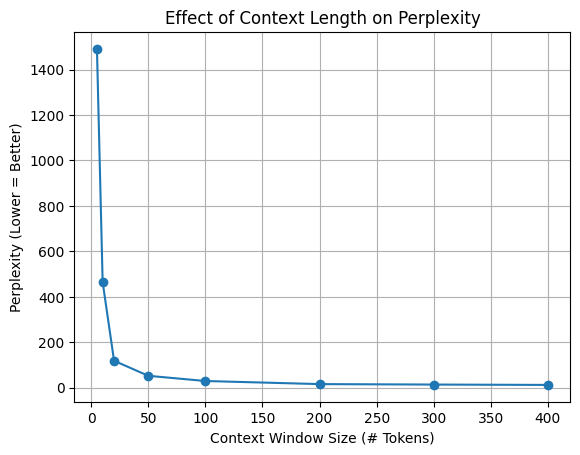

In [24]:
plt.figure()
plt.plot(context_sizes, ppls, marker='o')
plt.title("Effect of Context Length on Perplexity")
plt.xlabel("Context Window Size (# Tokens)")
plt.ylabel("Perplexity (Lower = Better)")
plt.grid(True)
plt.show()